# <center>Dataset 1 : COVID Rate.</center>
### Author : Aniket Jambukar

### Student ID : 20185014

### email ID : x20185014@student.ncirl.ie

Aim of the project is to gather Covid rate data for EU Countries.
The Union currently counts 27 EU countries. The United Kingdom withdrew from the European Union on 31 January 2020.

Web scraping data using selenium and pyautogui.
Sources for scrapping are as follows:
1) Name of EU Union Countries https://europa.eu/european-union/about-eu/countries_en
    
    From this website gathered names of the countries in EU Union.

2) Population of EU Countries https://europa.eu/european-union/about-eu/figures/living_en#population
    
    From this website gathered population of countries in EU Union to calculate total percent of population been infected.

3) Covid rate data was scrapped from google analytics page https://www.google.com/
    
    From this website gathered Covid rate of each date for all countries in EU Unioin.

## Step 1: Data Acquisition

### Step 1.1 : Scrapping country names from EU Union official website

In [46]:
### This block of scrapping code copies data for country names in EU Union
### We could have simply copy pasted names of EU Countries in a list hard coded
### This code is completely automated where it access the official European Union website and copies the country names.
### Automted code will enable to fetch changes of country names as well changes in the list of EU country names

from selenium import webdriver #selenium library for web scrapping
from selenium.common.exceptions import NoSuchElementException #selenium exceptions
import pyautogui #pyautogui library for controlling mouse and keypads
import time #time library
import csv #csv library to create a csv file

cnt_list = [] #this list will contain all names of EU Countries

#chrome webdriver is required to access websites on browsers and should be saved on local folder
#chrome webdriver can be downloaded from https://chromedriver.chromium.org/downloads
chrome = webdriver.ChromeOptions() #to enable chrome options
chrome.add_argument("start-maximized") #maximizes the chrome window

driver = webdriver.Chrome('./chromedriver') #opens chrome browser
driver.maximize_window() #maximizes chrome window

driver.get('https://europa.eu/european-union/about-eu/countries_en') #opens webpage to fetch county names in EU Union
time.sleep(5) #waits for 5 seconds for webpage to open
try:
    driver.find_element_by_xpath('//*[@id="ec-survey-pop-up-body-button-do-not-participate"]').click()
except NoSuchElementException:
    pass
### This webpage has a table with 2 columns and have country names against xpaths
### With xpaths we can fetch the country names as below code does
### Looking at the webpage we know there are 27 countries at present but wan't to automate for future use.
### In future Union may add or remove coutries so to automate we have used loop which can executes for 50 times
### So as per below loop code we can fetch upto 100 coutry names
### Code automated if new countries are added or existing are removed from list
try:
    for num in range(2, 52):
        # Will fetch country name from first column of table serially
        cnt_list.append(driver.find_element_by_xpath('//*[@id="year-entry2"]/table/tbody/tr[' + str(num) + ']/td[1]/a').text)
        # Will fetch country name from second column of table serially
        cnt_list.append(driver.find_element_by_xpath('//*[@id="year-entry2"]/table/tbody/tr[' + str(num) + ']/td[2]/a').text)
except NoSuchElementException:
    # There are 15 rows and 2 coumns at present in the table of webpage
    # As a coutry will be added or removed from list this number of rows will change
    # As above loop will run abov 15 it will give errors saying no values found
    # This exception will handle this error
    # Any new row added upto 50 roes will be captured with above loop code
    # this automated code will fetch exact country names in the table of webpage in future as well
    pass

cnt_list = sorted(cnt_list, key=str.lower) # Sorted country names alphabetically
print('*************** List of countries in EU Union ***************')
print(cnt_list) # Prints names of EU Countries fetched from above automated code

*************** List of countries in EU Union ***************
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


### Step 1.2 : Scrapping country population from EU Union official website

In [43]:
### We will get number of covid cases but we want to calculate the percent of population of each country been infected
### This block of scrapping code copies data of population of each country in EU Union
### Soure is the European union website

population = {} # Dictionary in which we will store country name and its population

driver.get('https://europa.eu/european-union/about-eu/figures/living_en#population') # EU website population page
time.sleep(5) #waits for 5 seconds for webpage to open
# On this webpage its shows pie chart with population details of all EU Countries
# It has a button on click to view tabular data

try:
    driver.find_element_by_xpath('//*[@id="ec-survey-pop-up-body-button-do-not-participate"]').click()
except NoSuchElementException:
    pass

# Click to open tabular data
driver.find_element_by_xpath('//*[@id="block-bean-wt-chart-population-country"]/div/div/div/div/div/div/div/div[1]/span/a').click()

# Tabular data has two columns country name and its population
# In above block of code we have automated to fetch upto 100 country names
# in this block we will automate the code to hold data of 100 countries as per below loop
try:
    for num in range(1, 101):
        # Copies data COUNTRY NAME and its POPULATION in the dictionary
        population[driver.find_element_by_xpath('//*[@id="highcharts-data-table-1"]/tbody/tr[' + str(num) + ']/th').text] = driver.find_element_by_xpath('//*[@id="highcharts-data-table-1"]/tbody/tr[' + str(num) + ']/td').text
except NoSuchElementException:
    # There are 27 rows at present in the table of webpage
    # As a coutry will be added or removed from list this number of rows will change
    # As above loop will run above 27 it will give errors saying no values found
    # This exception will handle this error
    # Any new row added upto 100 rows will be captured with above loop code
    # this automated code will fetch exact country names and its population in the table of webpage in future as well
    pass

print('*************** Dictionary with name of countries in EU Union and their population ***************')
print(population) # Prints names of EU Countries and its population fetched from above automated code

*************** Dictionary with name of countries in EU Union and their population ***************
{'Austria': '8901064', 'Belgium': '11522440', 'Bulgaria': '6951482', 'Cyprus': '888005', 'Czechia': '10693939', 'Germany': '83166711', 'Denmark': '5822763', 'Estonia': '1328976', 'Greece': '10718565', 'Spain': '47332614', 'Finland': '5525292', 'France': '67320216', 'Croatia': '4058165', 'Hungary': '9769526', 'Ireland': '4964440', 'Italy': '59641488', 'Lithuania': '2794090', 'Luxembourg': '626108', 'Latvia': '1907675', 'Malta': '514564', 'Netherlands': '17407585', 'Poland': '37958138', 'Portugal': '10295909', 'Romania': '19328838', 'Sweden': '10327589', 'Slovenia': '2095861', 'Slovakia': '5457873'}


### Step 1.3 : Scrapping covid rate for countries in EU Union

In [44]:
### This block of code collects covid rate data for every single day from google statistics page
### We receive new cases for each day for evry country from this source
### We have to calculate running totals and percent of total population been infected for each day

fin_list = [] # list that saves all data been scraped and calculated
header_csv = ['Country', 'Date', 'New_cases', 'Total_Cases', 'Total_Percent'] # headers for csv file

print('*************** Covid rate data ***************')
# google statistics page for scraping covid rate data
driver.get('https://www.google.com/search?q=covid+rate+ireland&ei=UPxmYM2gMpGq1fAPqM6n0AU&oq=covid+rate+ireland&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6BwgAELADEEM6BAgAEEM6AggAOgUIABCRAjoFCAAQyQM6BQgAEJIDOgYIABAWEB5QoTpYsVNg1VRoAXACeACAATaIAewCkgEBOZgBAKABAaoBB2d3cy13aXrIAQrAAQE&sclient=gws-wiz&ved=0ahUKEwjNiKH8tt_vAhURVRUIHSjnCVoQ4dUDCBc&uact=5')
time.sleep(5)#waits for 5 seconds for webpage to open

driver.find_element_by_xpath('//*[@id="zV9nZe"]/div').click() #click to accept cookies
driver.find_element_by_xpath('//*[@id="tsf"]/div[1]/div[1]/div[2]/div/div[2]/input').clear() # clear the search space
for x in cnt_list: # list of country names scraped in 1st block above, so in loop we scrape covid rate data for every country
    print('Scraping covid rate data for : ', x)
    date_prev = '' # to capture last date
    date_crt = '' # to capture current date
    tot = 0 # variable to calculate total cases
    pop_per = population[x] # population fetched from dictionary scraped in 2nd block
    # clear the google search space
    driver.find_element_by_xpath('//*[@id="tsf"]/div[1]/div[1]/div[2]/div/div[2]/input').clear()
    # inert string to search country covid rate statistics
    driver.find_element_by_xpath('//*[@id="tsf"]/div[1]/div[1]/div[2]/div/div[2]/input').send_keys('covid rate ' + x + ' statistics')
    # click the search button
    driver.find_element_by_xpath('//*[@id="tsf"]/div[1]/div[1]/div[2]/button/div').click()
    time.sleep(2) # wait 2 seconds for page to load
    for y in range(0, 1000):
        pyautogui.click((410 + y), 808) # coordinate location for 0 point and will increment as per loop
        id0 = driver.find_element_by_xpath('//*[@id="TSn4rb"]/div/div[2]/div[3]/div[1]/div[1]').text # captures date
        date_crt = id0 # copy date to a variable
        if id0 == '10 Apr 2021': # if condition to scrape data till 10 Apr 2021 only
            break # breaks execution if date obtained is 10 Apr 2021
        else:
            # captures new cases number for the date
            id1 = driver.find_element_by_xpath('//*[@id="TSn4rb"]/div/div[2]/div[3]/div[1]/div[2]/div[1]/span[3]').text
            # this if compares if date captured is for previous date
            # if not it adds the new cases for previous date and current date to calculate the running total of covid cases
            if date_prev != date_crt:
                tot = tot + int(id1.replace(",", ""))  # adds up to get total number of cases, replaces any commas in numbers
                date_prev = date_crt # sets previous date to current date
            # appends country name, date, new cases, total cases and percentage of population infected
            fin_list.append([x, id0, int(id1.replace(",", "")), int(tot), round(((int(tot)/int(pop_per))*100),2)])

driver.close() # closes chrome browser

### Entire data in saved in list above and is used to create a CSV file for data as below
file = open('Covid_Rate_Data.csv', 'w+', newline ='')
# writes data from list to CSV
with file:
    create_csv = csv.writer(file)
    create_csv.writerow(header_csv)
    create_csv.writerows(fin_list)
    
print('*************** File named Covid_Rate_Data.csv is created ***************')

*************** Covid rate data ***************
*************** File named Covid_Rate_Data.csv is created ***************


## Step 2: Database Management load data to MongoDB

In [1081]:
### Loading scrapped data from CSV to Mongo DB
from pymongo import MongoClient # pymongo library to access Mongo DB

# setting db name = Covid_Rate_DB and collection name = covid_collection
mongo_client_name = MongoClient()
print('*************** Mongo DB client deatils : ', mongo_client_name) # print client details
mongo_db_name = mongo_client_name.Covid_Rate_DB
print('\n*************** DB details : ', mongo_db_name) # print DB details

# reads data from csv and loads to Mongo DB
print('\n*************** Read data from CSV ***************')
reader_for_csv = csv.DictReader(open('Covid_Rate_Data.csv'))

for row in reader_for_csv:
    mongo_db_name.covid_collection.insert_one(row)
    
print('\n*************** Data loaded to Mongo DB ***************')

*************** Mongo DB client deatils :  MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

*************** DB details :  Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Covid_Rate_DB')

*************** Read data from CSV ***************

*************** Data loaded to Mongo DB ***************


## Step 3: Data Cleaning and Transformation

### Step 3.1 : Reading data from Mongo DB and date string data cleaning

In [1082]:
import pandas as pd # pandas library for data formats and various data activities
from datetime import datetime # data library for working with dates data

fin_lst = [] # list in which data will be loaded initial
print('*************** Read data from Mongo DB ***************')
covid_data = mongo_db_name.covid_collection # set varaible to read data from collection
details = covid_data.find() # read data to variable

print('\n*************** Data retrieved from Mongo DB successfully ***************')
for rec in details:
    # data cleaning for date strings in data
    # data cleaning in date month string of Sept converted to Sep and year 20 to 2020 and 21 to 2021
    # data cleaning done to achieve proper date strings
    fin_lst.append([rec["Country"], pd.to_datetime(((rec["Date"].replace(' Sept',' Sep')).replace( '-20', '-2020').replace('-21', '-2021'))), rec["New_cases"], rec["Total_Cases"],rec["Total_Percent"]])

print('\n*************** Data saved to a list successfully ***************')

*************** Read data from Mongo DB ***************

*************** Data retrieved from Mongo DB successfully ***************

*************** Data saved to a list successfully ***************


### Step 3.2 : Checking for duplicate data

In [58]:
# print length of the list i.e that will be number of records
print('Len of list with raw data :', len(fin_lst))

# print number of duplicate records in list
dupes = [x for n, x in enumerate(fin_lst) if x in fin_lst[:n]]
print('\nDuplicate records :', len(dupes))

# save unique data to new list
new_lst = [ii for n, ii in enumerate(fin_lst) if ii not in fin_lst[:n]]

# print length of the new list i.e unique number of records
print('\nLen of list unique records :', len(new_lst))


Len of list with raw data : 20831

Duplicate records : 10393

Len of list unique records : 10438


### Step 3.3 : Create dataframe and check for null values and Statistical analysis

In [65]:
import numpy as np # numpy library for various data operations

name = ['COUNTRY', 'DATE', 'NEW_CASES', 'TOTAL_CASES', 'PERCENT_INFECTED'] # headers for dataframe
df = pd.DataFrame(np.array(new_lst),columns = name) # create dataframe from list
print('*************** Dataframe with data for analysis ***************')
print(df) # print dataframe

print('\n*************** Dataframe description ***************')
print(df.describe()) # print dataframe details

print('\n*************** Check for null values in dataframe ***************')
print('\nAny null values in data: ', df.isnull().values.any())

print('\n*************** Country wise number of records ***************')
print(df.groupby('COUNTRY').size()) # print country wise number of records

min_max_dates = df.groupby('COUNTRY').agg({'DATE':[min, max]})
print('\n*************** Country wise from date and to date ***************')
print(min_max_dates)

*************** Dataframe with data for analysis ***************
       COUNTRY       DATE NEW_CASES TOTAL_CASES PERCENT_INFECTED
0      Austria 2020-03-08        25          25              0.0
1      Austria 2020-03-09        27          52              0.0
2      Austria 2020-03-10        51         103              0.0
3      Austria 2020-03-11        64         167              0.0
4      Austria 2020-03-12        56         223              0.0
...        ...        ...       ...         ...              ...
10433   Sweden 2021-04-05         0      813104             7.87
10434   Sweden 2021-04-06     21802      834906             8.08
10435   Sweden 2021-04-07      6814      841720             8.15
10436   Sweden 2021-04-08      7822      849542             8.23
10437   Sweden 2021-04-09      7772      857314              8.3

[10438 rows x 5 columns]

*************** Dataframe description ***************
       COUNTRY                 DATE NEW_CASES TOTAL_CASES PERCENT_INFECTED

<ipython-input-65-23732583fd93>:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe()) # print dataframe details


### Step 3.4 : Check for any missing dates in countries data

In [71]:
# we have created min and max dates for all countries in min_max_dates list in above block
# with min and max dates we can check if any date data is missing for a country
no_dt = {}

for country_name in cnt_list:
    country = df[df.COUNTRY == country_name] # for a country in loop fetch all data from dataframe to a single dataframe
    dt_lst = country['DATE'].tolist() # take all dates for the country in list
    mydates = pd.date_range(min(country['DATE']), max(country['DATE'])).tolist() # create a list of range for min and max dates
    dt = [item for item in mydates if item not in dt_lst] # check for missing dates
    if len(dt) > 0:
        no_dt[country_name] = [item for item in mydates if item not in dt_lst] # for dates missing insert date to list
    dt = []
    dt_lst = []
    mydates = []

# print missing dates data
print('Data is missing for ', len(no_dt), ' countries' )
for rec_cnts in no_dt:
    print('\nFor ', rec_cnts, len(no_dt[rec_cnts]),' date records are missing')
    
print('\n*************** Print missing data ***************')
print(no_dt)

Data is missing for  2  countries

For  France 20  date records are missing

For  Spain 96  date records are missing

*************** Print missing data ***************
{'France': [Timestamp('2020-05-28 00:00:00', freq='D'), Timestamp('2020-06-02 00:00:00', freq='D'), Timestamp('2020-06-25 00:00:00', freq='D'), Timestamp('2020-06-27 00:00:00', freq='D'), Timestamp('2020-06-28 00:00:00', freq='D'), Timestamp('2020-06-29 00:00:00', freq='D'), Timestamp('2020-07-04 00:00:00', freq='D'), Timestamp('2020-07-05 00:00:00', freq='D'), Timestamp('2020-07-06 00:00:00', freq='D'), Timestamp('2020-07-11 00:00:00', freq='D'), Timestamp('2020-07-12 00:00:00', freq='D'), Timestamp('2020-07-13 00:00:00', freq='D'), Timestamp('2020-07-14 00:00:00', freq='D'), Timestamp('2020-07-15 00:00:00', freq='D'), Timestamp('2020-07-18 00:00:00', freq='D'), Timestamp('2020-07-19 00:00:00', freq='D'), Timestamp('2020-07-20 00:00:00', freq='D'), Timestamp('2020-12-30 00:00:00', freq='D'), Timestamp('2020-12-31 00:00

### Step 3.5 : Data preparation for missing dates data

In [72]:
# we have countries where data was absent for few dates for few countries
# we cannot predict number of cases for the missing dates
# this scenario is not like to prdeict a price for some product
# to avoid false data we will insert 0 new cases for missing date
# total and percent of population infected will be copied from previous dates records
from datetime import datetime, timedelta # library to include timedelta

for recs_cnt in no_dt: # countries with missing dates in loop
    for rec_dt in no_dt[recs_cnt]: # loop for missing dates for a country
        insert_df = df[df['COUNTRY'] == recs_cnt] # taking data for country from df dataframe to a temporary dataframe
        insert_1_dt = insert_df[insert_df['DATE'] == rec_dt - timedelta(days= 1)] # taking data of previous day to a temporary dataframe
        if len(insert_1_dt) != 0: # check if data was captured in temporary dataframe
            insert_1_dt['DATE'] = rec_dt # replace the date from previous date to actual missing date
            insert_1_dt['NEW_CASES'] = 0 # replace new cases number to 0
            df = df.append(insert_1_dt) # append temporary dataframe to the main df dataframe

print('\n*************** Country wise number of records ***************')           
print(df.groupby('COUNTRY').size())

### As per above blocks France has 385 records and 20 are missing for when we execute this loop Frnace should have 405 records
### As per above blocks Spain has 314 records and 96 are missing for when we execute this loop Frnace should have 410 records

<ipython-input-72-d83e2f674fbd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insert_1_dt['DATE'] = rec_dt # replace the date from previous date to actual missing date
<ipython-input-72-d83e2f674fbd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insert_1_dt['NEW_CASES'] = 0 # replace new cases number to 0



*************** Country wise number of records ***************
COUNTRY
Austria        398
Belgium        400
Bulgaria       381
Croatia        382
Cyprus         377
Czechia        393
Denmark        391
Estonia        387
Finland        388
France         405
Germany        405
Greece         388
Hungary        385
Ireland        392
Italy          412
Latvia         381
Lithuania      379
Luxembourg     384
Malta          368
Netherlands    400
Poland         392
Portugal       393
Romania        392
Slovakia       383
Slovenia       388
Spain          410
Sweden         400
dtype: int64


### Step 3.6 : Recheck for any missing dates in countries data

In [76]:
no_dt = {}

for country_name in cnt_list:
    country = df[df.COUNTRY == country_name] # for a country in loop fetch all data from dataframe to a single dataframe
    dt_lst = country['DATE'].tolist() # take all dates for the country in list
    mydates = pd.date_range(min(country['DATE']), max(country['DATE'])).tolist() # create a list of range for min and max dates
    dt = [item for item in mydates if item not in dt_lst] # check for missing dates
    if len(dt) > 0:
        no_dt[country_name] = [item for item in mydates if item not in dt_lst] # for dates missing insert date to list
    dt = []
    dt_lst = []
    mydates = []

# print missing dates data
print('Data is missing for ', len(no_dt), ' countries' )
for rec_cnts in no_dt:
    print('\nFor ', rec_cnts, len(no_dt[rec_cnts]),' date records are missing')
    
print('\n*************** Print missing data ***************')
print(no_dt)

print('\n*************** Dataframe description ***************')
print(df.describe()) # print dataframe details

Data is missing for  0  countries

*************** Print missing data ***************
{}

*************** Dataframe description ***************
       COUNTRY                 DATE NEW_CASES TOTAL_CASES PERCENT_INFECTED
count    10554                10554     10554       10554            10554
unique      27                  419      3968        9480              971
top      Italy  2020-09-01 00:00:00         0         433             0.05
freq       412                   27       348          11              286
first      NaN  2020-02-23 00:00:00       NaN         NaN              NaN
last       NaN  2021-04-16 00:00:00       NaN         NaN              NaN


<ipython-input-76-5f965048d11b>:23: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe()) # print dataframe details


### Data is clean and ready to be inserted into a structured database PostgreSQL

## Step 4 : Database Management load data to PostgreSQL

In [84]:
import psycopg2 # library for PostgreSQL
from psycopg2 import Error # to handle errors in PostgreSQL

lst_tuple = []
lst_tuple = [tuple(x) for x in df.to_numpy()]

# try connecting to PostgreSQL
try:
    # details pf PostgreSQL database
    connection = psycopg2.connect(user="postgres", password="aniket_nci", host="localhost", port="5432", database="postgres")

    # Create a cursor for operations
    cursor = connection.cursor()
    
    # Server information
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    
    # Fetch PostgreSQL version details
    cursor.execute("SELECT version();")
    
    # Print PostgreSQL version details
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
    
    create_table =  """CREATE TABLE COVID_ANALYSIS ( COUNTRY VARCHAR ( 100 ) NOT NULL, 
                    DATE DATE NOT NULL, 
                    NEW_CASES INT  NOT NULL, 
                    TOTAL_CASES INT NOT NULL, 
                    TOTAL_PERCENT NUMERIC NOT NULL, 
                    UNIQUE(COUNTRY, DATE));"""
    
    cursor.execute(create_table)
    print('*************** Table COVID_ANALYSIS created in PostgreSQL successfully ***************')
    
    # pepare data to insert in database
    records_list_template = ','.join(['%s'] * len(lst_tuple))
    
    # prepre a insert query to insert data
    insert_query = 'insert into COVID_ANALYSIS (COUNTRY, DATE, NEW_CASES,TOTAL_CASES,TOTAL_PERCENT) values {}'.format(records_list_template)
    cursor.execute(insert_query, lst_tuple)
    connection.commit()

    print('\n*************** Data inserted to COVID_ANALYSIS table successfully ***************')

except (Exception, Error) as error:
    # exception handeled if any error while connecting to PostgreSQL
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close() # close the cursor for operations
        connection.close() # close PostgreSQL data connection
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 13.2, compiled by Visual C++ build 1914, 64-bit',) 

*************** Table COVID_ANALYSIS created in PostgreSQL successfully ***************

*************** Data inserted to COVID_ANALYSIS table successfully ***************
PostgreSQL connection is closed


## Step 5 : Data Visualization and Insights

### Step 5.1 : Read data from PostgreSQL database and create dataframe

In [1083]:
# connect to PostgreSQL database
local_PSQL = psycopg2.connect(database="postgres", user="postgres", password="aniket_nci", host="localhost", port="5432")
print("PostgreSQL database connected successfully")

# headers for data frame
column_names = ['COUNTRY', 'DATE', 'NEW_CASES', 'TOTAL_CASES', 'TOTAL_PERCENT']

PSQLCursor = local_PSQL.cursor() # cursor to execute queries 
PSQLCursor.execute("SELECT COUNTRY, DATE, NEW_CASES, TOTAL_CASES, TOTAL_PERCENT from COVID_ANALYSIS") #select data from PostgreSQL
PSQL_rows = PSQLCursor.fetchall() # fetch data from cursor

data_to_visualize = pd.DataFrame(PSQL_rows, columns=column_names) #create dataframe for data fetched from cursor

print("\nData retrived successfully")
# con.close()

data_to_visualize.head(10) # Dataframe for visualization

PostgreSQL database connected successfully

Data retrived successfully


,COUNTRY,DATE,NEW_CASES,TOTAL_CASES,TOTAL_PERCENT
0,Austria,2020-03-08,25,25,0.0
1,Austria,2020-03-09,27,52,0.0
2,Austria,2020-03-10,51,103,0.0
3,Austria,2020-03-11,64,167,0.0
4,Austria,2020-03-12,56,223,0.0
5,Austria,2020-03-13,202,425,0.0
6,Austria,2020-03-14,151,576,0.01
7,Austria,2020-03-15,205,781,0.01
8,Austria,2020-03-16,158,939,0.01
9,Austria,2020-03-17,314,1253,0.01


### Step 5.2 : Data visualization

### 5.2.1 Line chart : Country wise Covid-19 Cases in EU Union

In [1086]:
import matplotlib.pyplot as plt # matplotlib library for visualization
%matplotlib inline
cnt_names = []
x_axis_labels = []
y_axis_labels = []
line_chart_dataframe = pd.DataFrame(columns = ['CNT_NAME', 'X_AXIS', 'Y_AXIS'])
for cnt_rec in cnt_list: # fetch data countrywise from main dataframe 
    country_frame = data_to_visualize[data_to_visualize.COUNTRY == cnt_rec] # create dataframe countrywise
    country_frame['DATE']= pd.to_datetime(country_frame['DATE']) # convert string date in dataframe to date format
    tmp_dataframe = country_frame.groupby(country_frame['DATE'].dt.strftime('%Y-%m'))['NEW_CASES'].sum()#copy to temporary dataframe
    # create lists with country name, date(months), total cases
    for rec in tmp_dataframe.index.tolist(): # fetch data frome dataframe to lists
        x_axis_labels.append(rec)
        cnt_names.append(cnt_rec)
    y_axis_labels = country_frame.groupby(country_frame['DATE'].dt.strftime('%B-%Y'))['NEW_CASES'].sum().values.tolist()
    # append lists data to a new dataframe
    line_chart_dataframe = line_chart_dataframe.append(pd.DataFrame({'CNT_NAME':cnt_names, 'X_AXIS':x_axis_labels, 'Y_AXIS':y_axis_labels}))
    # clear lists
    cnt_names = []
    x_axis_labels = []
    y_axis_labels = []

# print dataframe for validation
line_chart_dataframe.head(10)

<ipython-input-1086-8650175348d3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CNT_NAME,X_AXIS,Y_AXIS
0,Austria,2020-03,5272
1,Austria,2020-04,25387
2,Austria,2020-05,6308
3,Austria,2020-06,78359
4,Austria,2020-07,45042
5,Austria,2020-08,53583
6,Austria,2020-09,3364
7,Austria,2020-10,1035
8,Austria,2020-11,10101
9,Austria,2020-12,86789


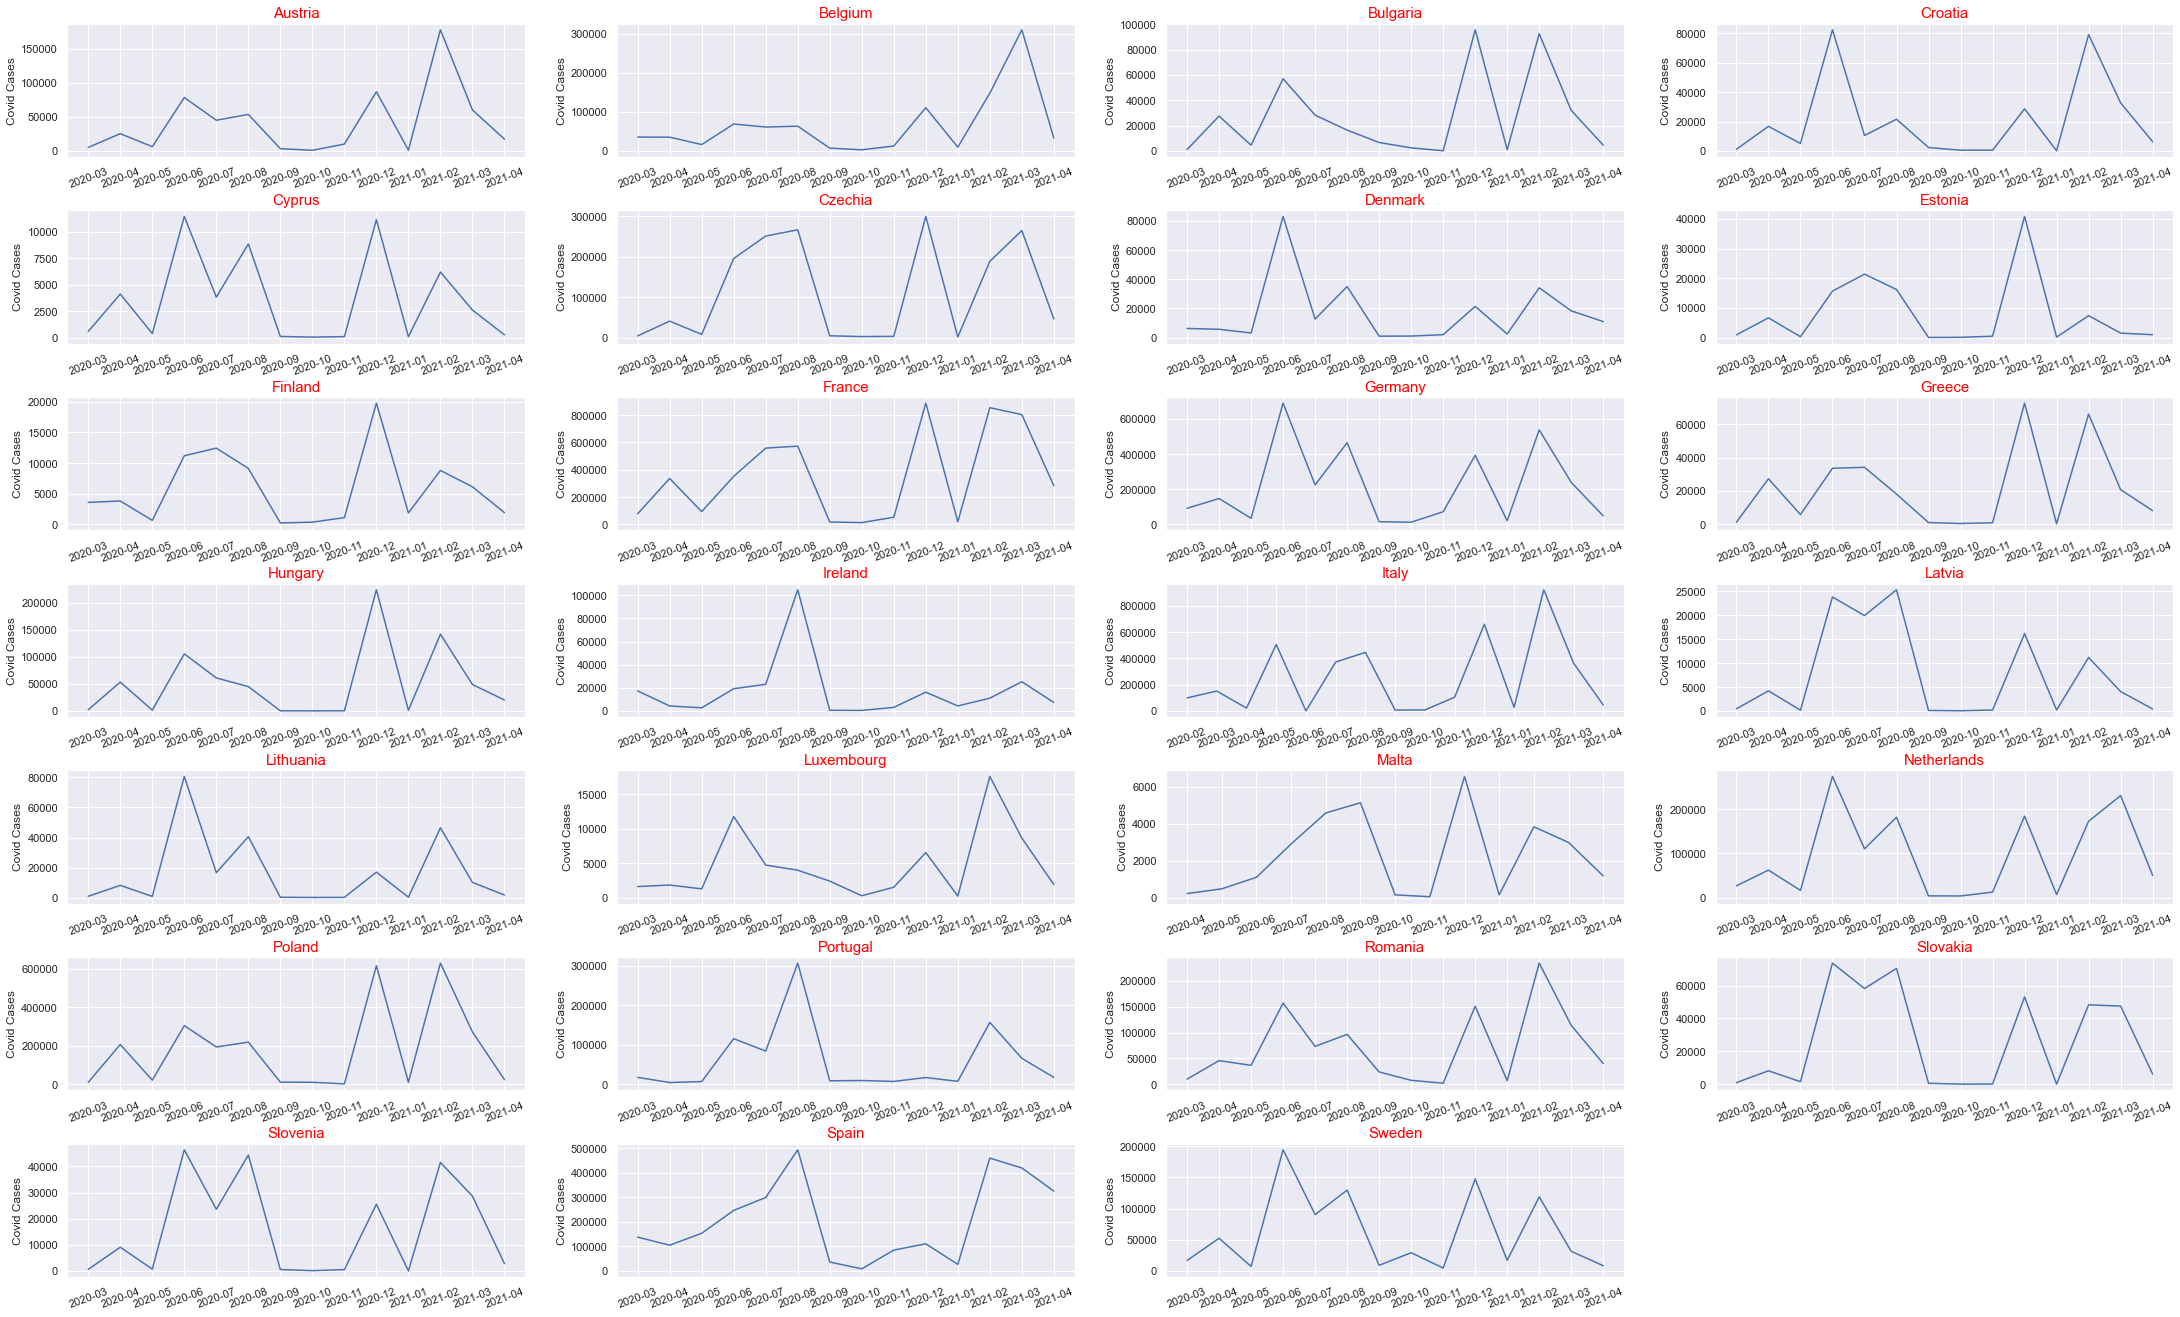

In [1041]:
### in above created dataframe we have data for countrywise monthly total covid cases
### below code subplots all country individual line plots with grid of (x, 4)
### x is calculated by len of countries names to be adjusted in grid of (x, 4)
### automated code to plot any n number of plots with frame of subplots (x, 4)
gpd = line_chart_dataframe.groupby(line_chart_dataframe['CNT_NAME']) # create group by country names
tmmp_dataframe = pd.DataFrame() # declare a temporary dataframe
ctrr = 1 # a counter to plot in subplots

for x in cnt_list: # country wise create subplots
    globals()['df_%s'%x] = gpd.get_group(str(x)) # get data for country in loop
    tmmp_dataframe = globals()['df_%s'%x] # copy data to temporary dataframe
    plt.subplot(round(len(cnt_list)/4)+1, 4, ctrr) # create a subplot array of (x, 4) and plot with positions with counter incremental
    plt.subplots_adjust(bottom=50, right=5, top=55, hspace = 0.4) # adjust subplots
    plt.plot(tmmp_dataframe['X_AXIS'], tmmp_dataframe['Y_AXIS'] , 2) # plot the line chart
    plt.xticks(rotation=20, horizontalalignment="center") # adjust x ticks with angle of 20 degrees for better readability
    plt.ylabel("Covid Cases") # ylabel names
    plt.title(x, color='Red', fontdict=dict(fontsize=15)) # title name as country names
    ctrr = ctrr + 1 # increment counter for subplots after every country in loop

plt.show() # plot the subplots
### automated code to plot any n number of countries plots with frame of subplots (x, 4)

### 5.2.2  Horizontal Chart : Total Covid-19 Cases in EU Union Countries

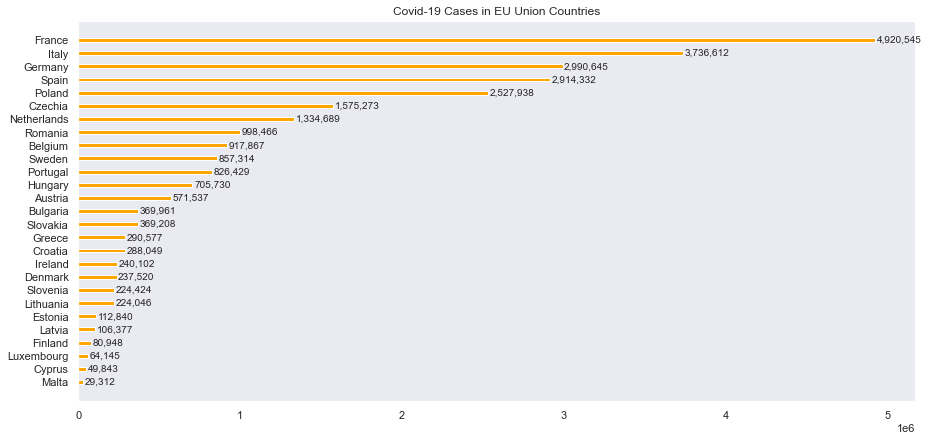

In [1033]:
### horizontal chart to plot country wise sum of Covid-19 cases in EU Countries

# create a dataframe countrywise total covid cases
cntry_max_dataframe = pd.DataFrame(data_to_visualize.groupby(data_to_visualize['COUNTRY'])['TOTAL_CASES'].max().sort_values())
line_length = cntry_max_dataframe['TOTAL_CASES'].tolist() # convert to list
plt.figure(figsize=(15,7)) # set figure size
plt.barh(cntry_max_dataframe.index,line_length, height = 0.3, color='orange') # plot horizontal chart

# automated code to plot total number of cases in horizontal chart
for index,data in enumerate(line_length):
    plt.text(y=index , x =(data+10000) , s=f"{data:,}" , fontdict=dict(fontsize=10), verticalalignment="center")

plt.title('Covid-19 Cases in EU Union Countries') # title
plt.grid(False) # no grids visible

plt.show() # plot horizontal bar chart

### automated code to plot Covid-19 cases with max to min cases country wise

### 5.3.3  Bar chart : Monthwise Total Covid-19 Cases in EU Union

(0.0, 6215408.0)

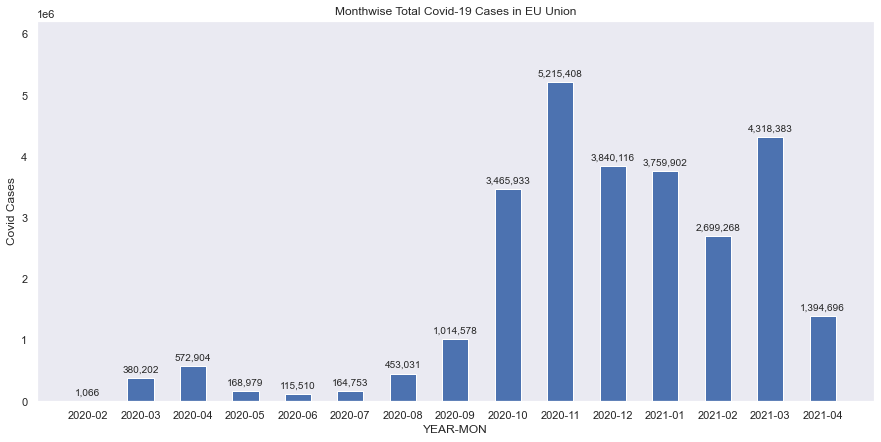

In [1068]:
### below code plots all monthwise total Covid-19 cases in EU Union 

data_to_visualize['DATE']= pd.to_datetime(data_to_visualize['DATE']) # convert string date in dataframe to date format

# copy data to temporary dataframe with sum of all countries Covid-19 cases monthwise
monthwise_tot_cases = data_to_visualize.groupby(pd.Grouper(key='DATE',freq='M')).sum()

bar_x = []
bar_tick_label = []
# copy data to lists to format date in YYYY-MM format
for rec in monthwise_tot_cases.index.tolist():
    bar_x.append(str(rec)[:7])
    bar_tick_label.append(str(rec)[:7])
# copy sum of cases to lists
bar_height = monthwise_tot_cases['NEW_CASES'].tolist()
plt.figure(figsize=(15,7)) # set graph size
bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label, width=0.5) # plot the bar graph

# automated code to plot total number of cases in bar chart
for index,data in enumerate(bar_height):
    plt.text(x=index , y =(data+100000) , s=f"{data:,}" , fontdict=dict(fontsize=10), horizontalalignment="center")
    
plt.xticks(rotation=0, horizontalalignment="center") # adjust xticks
plt.xlabel("YEAR-MON") # xlabel name
plt.ylabel("Covid Cases") # ylabel name
plt.title('Monthwise Total Covid-19 Cases in EU Union') # title name
plt.grid(False) # no grids visible
plt.ylim(0, max(bar_label)+1000000) # plot y axis limit more that max value of y for better visualization

### 5.4.4  Pie chart : Percent of total population infected by COVID-19 and 5 most infected countries exploded

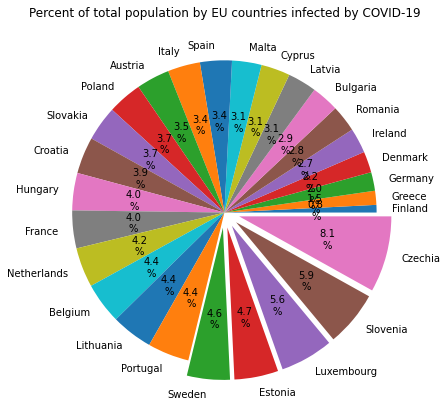

In [494]:
### pie chart visualization by total population of every country been effected by Covid-19
### automated code to explode most 5 infected countries in EU Union
### automated code implements sort by feature and explodes pie chart for 5 most infected countries

sort_by_percent = data_to_visualize.groupby('COUNTRY')['TOTAL_PERCENT'].max().sort_values() # copy to temporary dataframe
countries = sort_by_percent.index.to_list() # copy indexs of dataframe to a list
country_percents = [] # temporary list
cnt = 0 # counter to calculate the 5 most affected countries
exp = [] # temporary list
for rec in sort_by_percent:
    country_percents.append(rec) # append data to list
    cnt = cnt + 1 # increment counter
    if cnt >= (len(sort_by_percent) - 4): # calculate if country is amongst last 5 most affected as per % population infected
        exp.append(0.1) # if yes then append tepoaray list to 0.1 to explode
    else:
        exp.append(0.0) # if not then append tepoaray list to 0.0 not to explode

plt.figure(figsize=(12,7)) # plot size to plot

# plot pie chart
plt.pie(np.array(country_percents), labels = countries, autopct='%1.1f\n%%', startangle=0, explode=exp)
plt.title("Percent of total population by EU countries infected by COVID-19") # title of pie chart
plt.show() # plot pie chart

### adjust pie chart to be framed to centre of html page
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### 5.5.5  Map view : Geographic view total % of population in EU countries infected by COVID-19 with details on hover

In [1135]:
import plotly as py # plotly library to plot countries and data on world map
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot # import features from plotly
import plotly.graph_objs as go # import graph objects
init_notebook_mode(connected=True)

country_tot_cases = []
sort_by_percent_new = data_to_visualize.groupby('COUNTRY')['TOTAL_PERCENT'].max().sort_values() # copy to temporary dataframe
for rec in sort_by_percent_new.index:
    country_tot_cases.append('Covid-19 cases : ' + str(f"{data_to_visualize[data_to_visualize['COUNTRY'] == rec].groupby('COUNTRY')['TOTAL_CASES'].max().tolist()[0]:,}"))
    
# declare the dictionary for map plot colorscale, locations, data to be plot
data = dict(
type = 'choropleth',
colorscale = [[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]],
locations = countries,
locationmode = "country names",
z = country_percents,
text = country_tot_cases,
colorbar = {'title' : '% COVID-19 Infection'}
)
# layout settings for the map plot
layout_of_map = dict(width= 1000,
        height= 550,
        title = 'Geographical view total % of population in EU countries infected by COVID-19',
        geo = dict(showframe = False,
        projection = {'type':'mercator'}))
# plot map
covid_map = go.Figure(data = [data],layout = layout_of_map)
iplot(covid_map)

##################################################################
"""
This plot is not visible on github
Kindy open below link to view plots

https://htmtopdf.herokuapp.com/ipynbviewer/temp/d2aa90d25d63e67f42688a5267819a41/x20185014_Aniket_Jambukar.html?t=1619279949350
"""
##################################################################

'\nThis plot is not visible on github\nKindy open below link to view plots\n\nhttps://htmtopdf.herokuapp.com/ipynbviewer/temp/d2aa90d25d63e67f42688a5267819a41/x20185014_Aniket_Jambukar.html?t=1619279949350\n'

## Step 6 : Database Management load data to Azure Cloud

### 6.1 : Connect to Cloud Azure database and create a table

In [1057]:
host = "postgresqlserver11.postgres.database.azure.com" # hostname of Azure
dbname = "covidstockanalysis" # Database name
user = "covidstock@postgresqlserver11" # User name
password = "rjadha14!123" # Password
sslmode="require" # SSL Mode

print("Try connecting Cloud Azure Database")
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
                                                                             
azureConnection = psycopg2.connect(conn_string)
print("\nCloud Azure Connection established")

azureCursor = azureConnection.cursor() # cursor for executing queries

# SQL for creating table
createtableSql = """CREATE TABLE public.COVID_RATE
(
    country character varying(50) COLLATE pg_catalog."default",
    date date NOT NULL,
    new_cases numeric NOT NULL,
    total_cases numeric NOT NULL,
    total_percent numeric NOT NULL
);"""

azureCursor.execute(createtableSql) # execute create table SQL

print("\nTable COVID_RATE created successfully")

azureConnection.commit() #commit changes

Try connecting Cloud Azure Database

Cloud Azure Connection established

Table COVID_RATE created successfully


### 6.2 : Read data from local PostgreSQL Database

In [1087]:
PSQL_Connection = psycopg2.connect(database="postgres", user="postgres", password="aniket_nci", host="localhost", port="5432")
print("Connected to PostgreSQL database successfully")

column_names = ['COUNTRY', 'DATE', 'NEW_CASES', 'TOTAL_CASES', 'TOTAL_PERCENT'] # cloumn names for dataframe 

PSQL_Cursor = PSQL_Connection.cursor() # cursor to execute queries
# read data from PostgreSQL database
PSQL_Cursor.execute("SELECT COUNTRY, DATE, NEW_CASES, TOTAL_CASES, TOTAL_PERCENT from COVID_ANALYSIS")
# fetch data into variable
data_rows = PSQL_Cursor.fetchall()
print("\nData fetched from PostgreSQL database successfully")

data_to_azure = pd.DataFrame(data_rows, columns=column_names)

data_to_azure.describe() # print dataframe description and validate data

Connected to PostgreSQL database successfully

Data fetched from PostgreSQL database successfully


,NEW_CASES,TOTAL_CASES
count,10554.000000,1.055400e+04
mean,2611.780273,3.029624e+05
std,6123.263201,6.360241e+05
min,0.000000,0.000000e+00
25%,62.000000,6.784000e+03
50%,410.000000,5.055700e+04
75%,2034.750000,2.402098e+05
max,107053.000000,4.920545e+06


### 6.3 : Insert Data to Cloud Azure Database table

In [1059]:
import psycopg2.extras as extras # Pymongo extras library

def insert_data_azure(connection,dataframe, table):

    connection_azure = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
    azureConnection = psycopg2.connect(connection_azure)
    print("Cloud Azure Connection established")

    azureCursor = azureConnection.cursor()
    # List of tuples to insert data
    tuples_data = [tuple(x) for x in dataframe.to_numpy()]
    
    # Comma-separated dataframe columns
    cols = ','.join(list(dataframe.columns))
    
    azureCursor = azureConnection.cursor()
    # Insert SQL Statement
    insert_query  = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    try: # try to insert data
        extras.execute_values(azureCursor, insert_query, tuples_data)
        azureConnection.commit()
    except (Exception, psycopg2.DatabaseError) as error: #exception for errors
        print("Error: %s" % error)
        azureConnection.rollback()
        azureCursor.close()
        return 1
    print("\nData inserted to Cloud Azure database table successfully")
    azureCursor.close()
    
insert_data_azure(azureConnection, data_to_azure ,"covid_rate") # call function to insert data

azureCursor.close() # cursor closed
azureConnection.close() # connection to Cloud Azure database closed

Cloud Azure Connection established

Data inserted to Cloud Azure database table successfully


### 6.4 : Read data from Cloud Azure Database for validation

In [1092]:
# connection string for Cloud Azure database
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
# connect to Cloud Azure database
azureConnection = psycopg2.connect(conn_string)
print("Cloud Azure Database Connection established")

azureCursor = azureConnection.cursor() # cursor for queries

# fetch data from table
azureCursor.execute("SELECT * from COVID_rate") 
# data to a variable
data_from_azure = azureCursor.fetchall()
# create datframe
data_from_azure = pd.DataFrame(data_from_azure, columns=column_names)

print("Data read from Cloud Azure database table successfully")
print(data_from_azure.describe()) # print dataframe description and validate data

azureCursor.close()
azureConnection.close()

Cloud Azure Database Connection established
Data read from Cloud Azure database table successfully
       COUNTRY        DATE NEW_CASES TOTAL_CASES TOTAL_PERCENT
count    10554       10554     10554       10554         10554
unique      27         419      3967        9480           971
top      Italy  2020-09-27         0         433          0.05
freq       412          27       464          11           286


### Data inserted to Cloud Azure Database was read back and same number of rows were inserted.
### Data validated and ready to perform combined visualization with Vaccination and Stock rate databases.